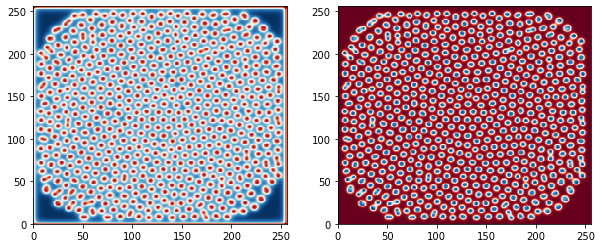

In [2]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-

from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags 



class GrayScott():
    """Class to solve Gray-Scott Reaction-Diffusion equation"""
    def __init__(self, N):
        self.N = N
        self.u = np.ones((N, N), dtype=float)
        self.v = np.zeros((N, N), dtype=float)
    
    
    def laplacian(self):
        """Construct a sparse matrix that applies the 5-point discretization"""
        N = self.N
        e=np.ones(N**2)
        e2=([1]*(N-1)+[0])*N
        e3=([0]+[1]*(N-1))*N
        A=spdiags([-4*e,e2,e3,e,e],[0,-1,1,-N,N],N**2,N**2)
      
        return A


    def initialise(self):
        """Setting up the initial condition"""
        N, N2, r = self.N, int(self.N/2), 16
        
        self.u += 0.02*np.random.random((N,N))
        self.v += 0.02*np.random.random((N,N))
        
        self.u[N2-r:N2+r, N2-r:N2+r] = 0.50
        self.v[N2-r:N2+r, N2-r:N2+r] = 0.25
        return  

    
    def integrate(self, Nt, Du, Dv, F, K, L):
        """Integrate the resulting system of equations using the Euler method"""
        u = self.u.reshape((N*N))
        v = self.v.reshape((N*N))

        #evolve in time using Euler method
        for i in range(Nt):
            uvv = u*v*v
            u += (Du*L.dot(u) - uvv +  F *(1-u))
            v += (Dv*L.dot(v) + uvv - (F+K)*v  )
        
        self.u = u
        self.v = v
        return
        
    
    def configPlot(self):
        """Plotting business"""
        u = self.u
        v = self.v
        f = plt.figure(figsize=(10, 4), facecolor='w', edgecolor='k');
        sp =  f.add_subplot(1, 2, 1 );
        plt.pcolor(u.reshape((N, N)), cmap=plt.cm.RdBu)
        plt.axis('tight')

        sp =  f.add_subplot(1, 2, 2 );
        plt.pcolor(v.reshape((N, N)), cmap=plt.cm.RdBu)
        plt.axis('tight')
        plt.show()
        
        
N = 256
rdSolver = GrayScott(N)
L = rdSolver.laplacian()
#Du, Dv, F, K = 0.16, 0.08, 0.060, 0.062
Du, Dv, F, K = 0.14, 0.06, 0.035, 0.065
Nt = 10000 

rdSolver.initialise()
rdSolver.integrate(Nt, Du, Dv, F, K, L)
rdSolver.configPlot()